In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
import mymodel

## 1. eset

* 400%-os terhelés (8 req/s - 2 req/s)
* 15s periódus
* timeout: 30s
* container indulás: ~5s
* szimuláció hossza: 30perc (120 periódus)

In [4]:
min_server = 1
max_server = 20
init_server = 1
rate = 8
timeFrame = 15 # time of one period: [s]
serv_rate = 2
cpu = 0.75
cont_start = 0 # timeFrame * cont_start sec
T = 120
timeout = None

model = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                      T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                      timeOut=timeout,cont_start=cont_start,timeFrame=timeFrame)

model.run()

In [5]:
visualizer = mymodel.Visualizer()

<IPython.core.display.Javascript object>


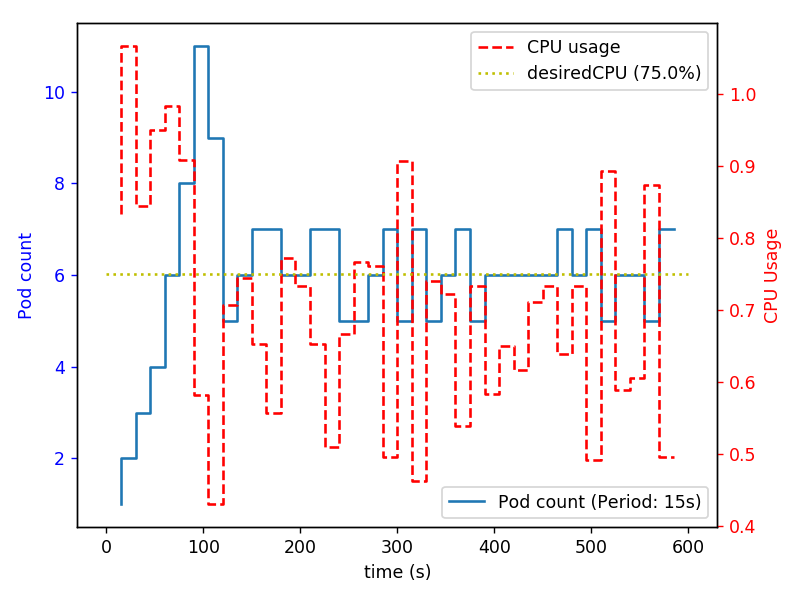

In [7]:
#visualizer.pod_count_resp_time(model)
visualizer.plot_cpu_per_pod([model],timeFrame=model.timeFrame,firstPeriod=0,lastPeriod=600)
plt.savefig('simulations/400_15s_0_0_120_0-600_time_inf.png')
#visualizer.plot_data([model],plot_type="pod_count",timeFrame=model.timeFrame,firstPeriod=0,lastPeriod=600)

In [7]:
S_mean = []
S_max = []
L_mean = []
L_max = []
S_var = []
CPU_mean = []

for i in range(0,100):
    model.run()
    model.calc_stats()
    s = model.stat
    S_mean.append(s['S_mean'])
    S_max.append(s['S_max'])
    L_mean.append(s['L_mean'])
    L_max.append(s['L_max'])
    S_var.append(s['S_var'])
    y = visualizer.calc_cpuUsage(model)
    CPU_mean.append(np.mean(y))
print('S_mean: '+str(np.mean(S_mean)))
print('S_max: '+str(np.mean(S_max)))
print('L_mean: '+str(np.mean(L_mean)))
print('L_max: '+str(np.mean(L_max)))
print('S_var: '+str(np.mean(S_var)))
print('CPU_mean: '+str(np.mean(CPU_mean)))

S_mean: 5.815333333333333
S_max: 10.51
L_mean: 126.26825000000001
L_max: 306.7
S_var: 1.1064125
CPU_mean: 0.7043393144126335


## 2. eset

* 400%-os terhelés (8 req/s - 2 req/s)
* 5s periódus
* timeout: 30s
* container indulás: ~5s
* szimuláció hossza: 30perc (360 periódus)

In [5]:
min_server = 1
max_server = 20
init_server = 1
rate = 8
timeFrame = 3 # time of one period: [s]
serv_rate = 2
cpu = 0.75
cont_start = 1 # timeFrame * cont_start sec
T = 600
timeOut = 6

model2 = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                      T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                      timeOut=timeOut,cont_start=cont_start,timeFrame=timeFrame)
model2.run()

In [6]:
#visualizer.pod_count_resp_time(model2)

## 3. eset

* 400%-os terhelés (8 req/s - 2 req/s)
* 15s periódus
* timeout: 60s
* container indulás: ~5s
* szimuláció hossza: 30perc (120 periódus)

In [7]:
min_server = 1
max_server = 20
init_server = 1
rate = 8
timeFrame = 15 # time of one period: [s]
serv_rate = 2
cpu = 0.75
cont_start = 0.3 # timeFrame * cont_start sec
T = 120
timeOut = 4

model3 = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                      T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                      timeOut=timeOut,cont_start=cont_start,timeFrame=timeFrame)
model3.run()

In [8]:
#visualizer.pod_count_resp_time(model3,0,250)

## A három eset összesítése

In [9]:
models = []
models.append(model)
models.append(model2)
models.append(model3)

#visualizer.plot_data(models=models,plot_type='resp_time')
#visualizer.plot_data(models=models,plot_type='pod_count',firstPeriod=0,lastPeriod=250)

# Model paraméterek összehasonlítása

## a) eset
* 600%-os terhelés (12 req/s - 2 req/s)
* 60s periódus
* timeout: 60s
* container indulás: ~8s
* szimuláció hossza: 30perc (30 periódus)


## b) eset
* 600%-os terhelés (12 req/s - 2 req/s)
* 30s periódus
* timeout: 60s
* container indulás: ~8s
* szimuláció hossza: 30perc (60 periódus)

## c) eset
* 600%-os terhelés (12 req/s - 2 req/s)
* 15s periódus
* timeout: 60s
* container indulás: ~8s
* szimuláció hossza: 30perc (120 periódus)


In [10]:
min_server = 1
max_server = 20
init_server = 1
rate = 12
timeFrame = 60 # time of one period: [s]
serv_rate = 2
cpu = 0.75
cont_start = 8/timeFrame # timeFrame * cont_start sec
T = 30
timeOut = 1

model_a = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                      T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                      timeOut=timeOut,cont_start=cont_start,timeFrame=timeFrame)

model_a.run()

min_server = 1
max_server = 20
init_server = 1
rate = 12
timeFrame = 30 # time of one period: [s]
serv_rate = 2
cpu = 0.75
cont_start = 8/timeFrame # timeFrame * cont_start sec
T = 60
timeOut = 2

model_b = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                      T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                      timeOut=timeOut,cont_start=cont_start,timeFrame=timeFrame)

model_b.run()

min_server = 1
max_server = 20
init_server = 1
rate = 12
timeFrame = 15 # time of one period: [s]
serv_rate = 2
cpu = 0.75
cont_start = 8/timeFrame # timeFrame * cont_start sec
T = 120
timeOut = 4

model_c = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                      T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                      timeOut=timeOut,cont_start=cont_start,timeFrame=timeFrame)

model_c.run()

min_server = 1
max_server = 20
init_server = 1
rate = 12
timeFrame = 7.5 # time of one period: [s]
serv_rate = 2
cpu = 0.75
cont_start = round(8/timeFrame) # timeFrame * cont_start sec
T = 240
timeOut = 8

model_d = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                      T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                      timeOut=timeOut,cont_start=cont_start,timeFrame=timeFrame)

model_d.run()

<IPython.core.display.Javascript object>


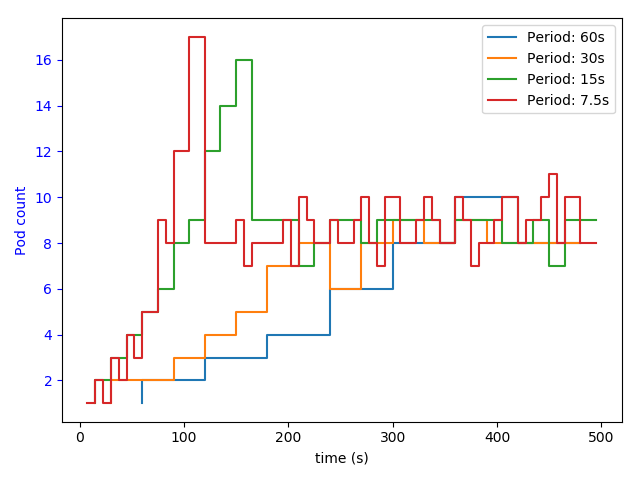

<IPython.core.display.Javascript object>


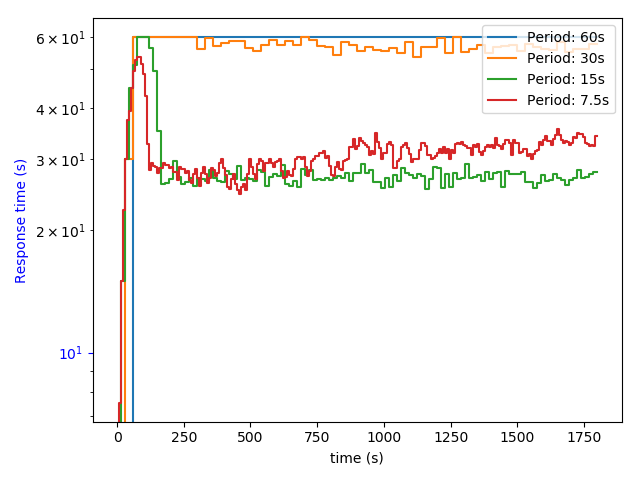

In [11]:
models = [model_a,model_b,model_c,model_d]
visualizer.plot_data(models,'pod_count',firstPeriod=0,lastPeriod=500)
visualizer.plot_data(models,'resp_time')

In [2]:
for i in [4,8,12,16,20]:
    min_server = 1
    max_server = 20
    init_server = 1
    rate = i
    timeFrame = 15 # time of one period: [s]
    serv_rate = 2
    cpu = 0.75
    cont_start = 8/timeFrame # timeFrame * cont_start sec
    T = 240
    timeOut = 4

    model_1 = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                          T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                          timeOut=timeOut,cont_start=cont_start,timeFrame=timeFrame)
    model_1.run()
    model_1.write_to_file()
    print(str(i) + "x rate DONE")

4x rate DONE
8x rate DONE
12x rate DONE
16x rate DONE
20x rate DONE


In [3]:
for i in [4,8,12,16,20]:
    min_server = 1
    max_server = 20
    init_server = 1
    rate = i
    timeFrame = 15 # time of one period: [s]
    serv_rate = 2
    cpu = 0.75
    cont_start = 1 # timeFrame * cont_start sec
    T = 240
    timeOut = 4

    model_1 = mymodel.Model(min_server=min_server,max_server=max_server,initial_server=init_server,
                          T=T,arrival_rate=rate*timeFrame,serving_rate=serv_rate*timeFrame,desiredCPU=cpu,
                          timeOut=timeOut,cont_start=cont_start,timeFrame=timeFrame)
    model_1.run()
    model_1.write_to_file()
    print(str(i) + "x rate DONE")

4x rate DONE
8x rate DONE
12x rate DONE
16x rate DONE
20x rate DONE
